# LAB 7: Error analysis

Objectives
* Construct a  linear text classifier using SGDClassifier
* Evaluate its performance and categorize the errors that it makes
* Exmine model's coefficients and decision function values
* Interpret model results using LIME

In [5]:
import pickle

import cloudpickle
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [6]:
train, test = pickle.load(open("/data/politics.pkl", "rb"))

In [7]:
sgd = cloudpickle.load(open("sgd.model", "rb"))
svm = cloudpickle.load(open("svm.model", "rb"))
mnb = cloudpickle.load(open("mnb.model", "rb"))

---

## Confusion matrix

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score

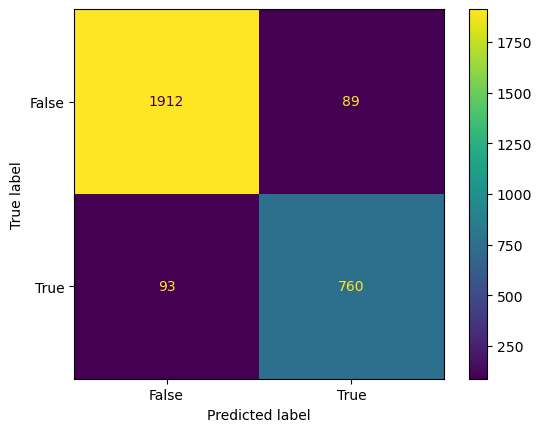

In [9]:
ConfusionMatrixDisplay.from_estimator(sgd, test["text"], test["pol"])

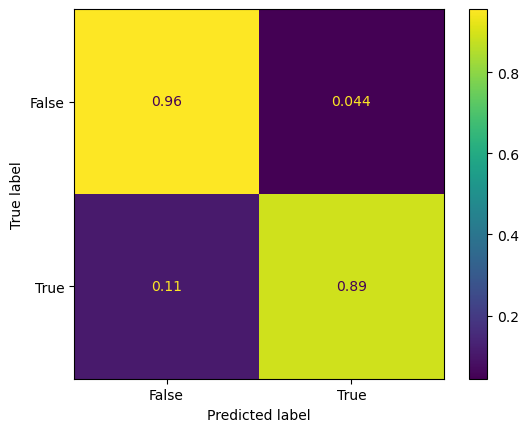

In [10]:
ConfusionMatrixDisplay.from_estimator(sgd, test["text"], test["pol"], normalize="true")

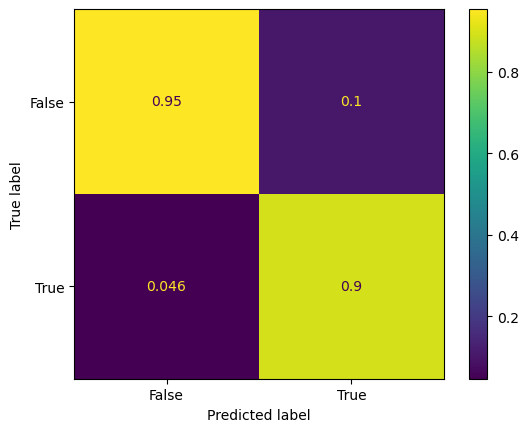

In [11]:
ConfusionMatrixDisplay.from_estimator(sgd, test["text"], test["pol"], normalize="pred")

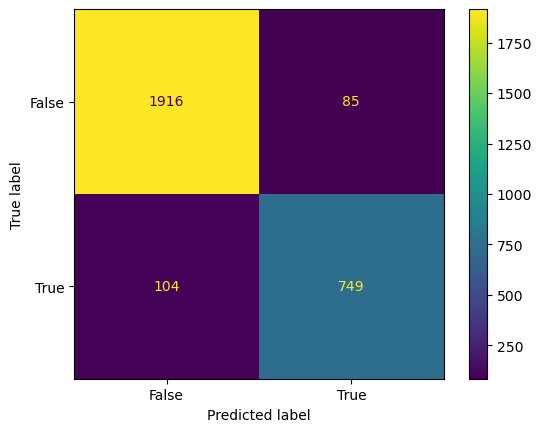

In [12]:
ConfusionMatrixDisplay.from_estimator(svm, test["text"], test["pol"])

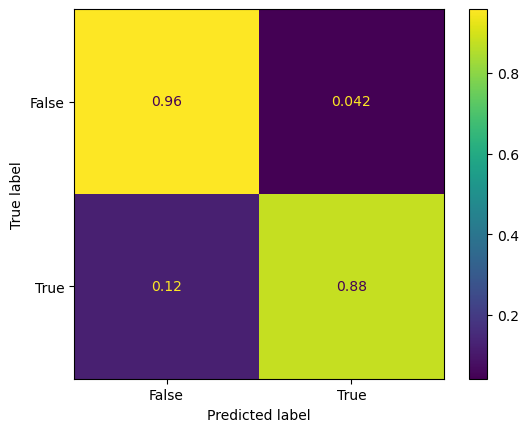

In [13]:
ConfusionMatrixDisplay.from_estimator(svm, test["text"], test["pol"], normalize="true")

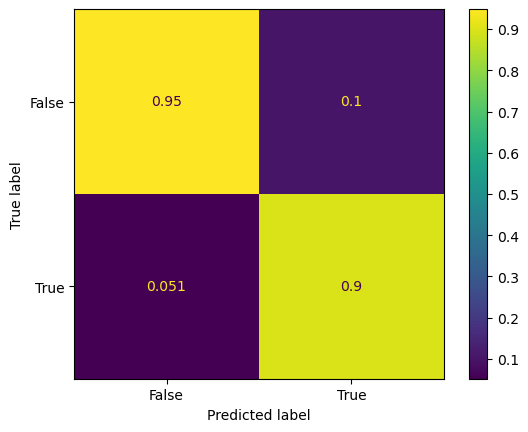

In [14]:
ConfusionMatrixDisplay.from_estimator(svm, test["text"], test["pol"], normalize="pred")

There is not lot of difference in the confusion matrices of both svm and sgd models. Since, SGD took less time, I will pick SGD from here. True positive rates and true negative rates are so close.

----

## Errors

In [8]:
predicted = sgd.predict(test["text"])

In [9]:
false_neg = test[test["pol"] & ~predicted]

In [10]:
false_neg["text"].iloc[0]

'Zaire and rebels drift further apart on peace plan. Rebels thrusting deeper in eastern Zaire on Thursday rejected the government\'s call for international monitors to help implement a U.N. truce plan. The government in turn again ruled out negotiations between ailing President Mobutu Sese Seko and rebel leader Laurent Kabila, who links a ceasefire to such talks. "Kabila is a mere puppet. How can President Mobutu negotiate with him while it\'s known that he is only a front man for the aggressors," Deputy Foreign Minister Lokondo Yoka told reporters in the capital Kinshasa. "Zaire has been attacked by Rwanda, Burundi and Uganda," he said. "If any Zairean who opposes the regime can take up arms to seize power with the support of foreign countries, this would be unfortunate." On Thursday French Foreign Minister Herve de Charette accused Uganda directly of intervening in Zaire. But he indicated France, which wants U.N. intervention to stop hostilities in a move that could save Mobutu\'s cr

In [11]:
false_neg["text"].iloc[1]

"NEWARK, N.J., VOTES TO EXTEND MONORAIL -- PAPER. The Newark, N.J. City Council gave preliminary approval to extending a monorail from the city's airport to a proposed convention center, the Star Ledger reported Wednesday. The city is in talks with developers interested in building the convention center itself, and a final vote on the center's monorail link is expected in September, according to the newspaper. ((--Steven Dickson, 212-859-1652))"

In [12]:
false_pos = test[~test["pol"] & predicted]

In [13]:
false_pos["text"].iloc[0]

'Ex-dissident visits Russia as Israeli minister. Natan Sharansky, forced out of the Soviet Union in 1986 after years of persecution for defending Jewish emigration, returned to Moscow on Monday in his new position as Israel\'s Trade and Industry Minister. "I am returning to a country where I spent many years, whose laguage I know, whose culture I share," Sharansky told reporters when he arrived at Moscow\'s international airport Sheremetyevo. Sharansky, 49, appeared far less excited than his elderly mother Ida Milgrom, who had followed her son into exile and was accompanying him on his return to Moscow. Sharansky, once one of the most celebrated Soviet dissidents in the West, turned down an invitation to visit Russia after the collapse of the Soviet Union in 1991. He changed his mind after becoming a minister in Benjamin Netanyahu\'s government following the success of his Yisrael ba-Aliya (Israel of Immigration) party in Israel\'s parliamentary elections last May. Sharansky has brough

In [14]:
false_pos["text"].iloc[1]

"Key JGB futures bounce back to close a bit higher. Key December Japanese government bond futures closed a little higher on Thursday, after their rebound to 122.55 indicated the firm support they can expect from investors' buying and speculation surrounding the buying. But after having climbed a little higher, the December contract stalled and nested in a comfortable zone to wait for the general election on Sunday, dealers said. Few market participants would be eager to initiate a venture in either direction before they see the results of the election, they said. The December contract closed at 122.74, up 0.12 from Wednesday. Volume was 34,778 contracts.   Various polls are pointing to a victory by the Liberal Democrats in the election, but many market players are still wary of the chances of the opposition Shinshinto winning. Shinshinto is calling for a huge tax cut of about 18 trillion yen, which would boost the economy and government debt issues as well. The market could lose ground